#  Natural Language Processing

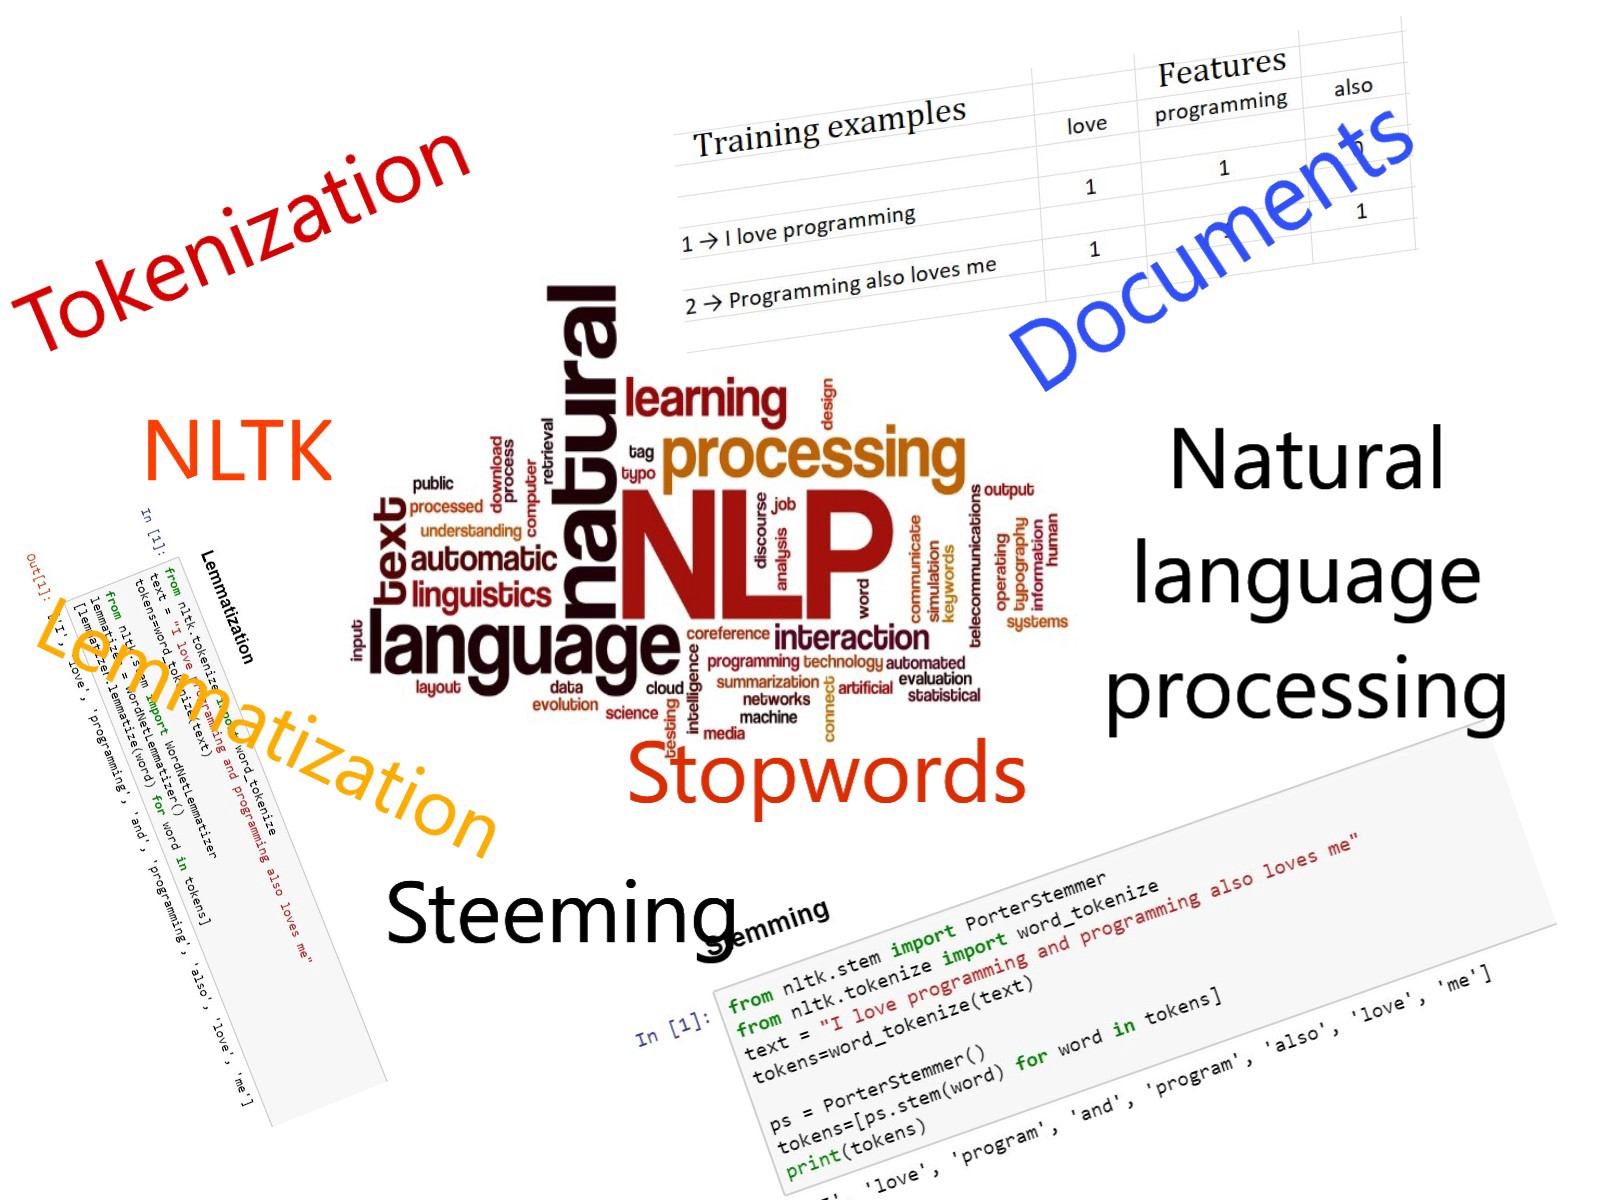

### 1. What to NLP?
### 2. NLP in real Life
### 3. Problem Statement
### 4. Project execution
### 5. Final submission

# What to NLP?
## Communicate with machines using human language

Natural Language Processing or NLP is a field of Artificial Intelligence that gives the machines the ability to read, understand and derive meaning from human languages.


## Source of data
Natural language refers to the way we, humans, communicate with each other.
We are surrounded by text.
Think about how much text you see each day:

* Tweets
* Signs
* Menus
* Email
* SMS
* Web Pages
and so much more…
The list is endless.

# NLP in Real Life
* Auto-Predict 
  (Google Search predicts user search results, Gmail predicts text while typing, etc).
* Auto-Correct (Google Keyboard and Grammarly correct words otherwise spelled wrong).
* Spam Filter (Gmail filters spam emails separately).
* Speech Recognition (Google WebSpeech or Vocalware).
* Chatbots(banking sector)
* Alexa

* ......and so on

**************
# Problem Statement
Twitter has now become a useful way to build one's business as it helps in giving the brand a voice and a personality. The platform is also a quick, easy and inexpensive way to gain valuable insight from the desired audience. Identifying the sentiments about the product/brand can help the business take better actions.

You have with you evaluated tweets about multiple brands. The evaluators(random audience) were asked if the tweet expressed positive, negative, or no emotion towards a product/brand and labelled accordingly.

## Dataset Description
This dataset contains around 7k tweet text with the sentiment label.

The file train.csv has 3 columns

tweet_id - Unique id for tweets. tweet - Tweet about the brand/product sentiment - 
#### 0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell

## Evaluation Metric
We will be using ‘weighted’ F1-measure as the evaluation metric for this competition. For more information on the F1-metric refer to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

## Submission format
Submission file should have two columns, one for tweet_id and sencond for sentiment [0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell]. A sample submission file has also been attached for reference.
*****************


## **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Data Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier,\
            ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier 

from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import unicodedata
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string 
from nltk.stem import WordNetLemmatizer
import re
import copy

from sklearn.utils import resample

# model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhobltru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dhobltru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dhobltru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## glance @ data

In [2]:
train_path = "train.csv"
test_path = "test.csv"

In [3]:
def read_data(filepath):
    df = pd.read_csv(filepath, encoding = 'UTF-8')
    return df

train_data = read_data(train_path)
test_data  = read_data(test_path)
print("train.shape: {} \ntest.shape: {}".format(train_data.shape, test_data.shape))

train.shape: (7274, 3) 
test.shape: (1819, 2)


In [4]:
train_data.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [5]:
test_data.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


#  1.  Know your dataset

In [6]:
# global variables

SENTIMENT_TO_CODE = {"NEGATIVE": 0,
                     "NEUTRAL": 1,
                     "POSITIVE": 2,
                     "CANT_TELL": 3}
CODE_TO_SENTIMENT = {0: "NEGATIVE",
                     1: "NEUTRAL",
                     2: "POSITIVE",
                     3: "CANT_TELL"}


###  1.1 Load and Prepare dataset 

In [7]:
train = copy.deepcopy(train_data)
test  = copy.deepcopy(test_data)

print("Null-test",test.isnull().sum().sum())
print("Null-train",train.isnull().sum().sum())

Null-test 0
Null-train 1


In [8]:
train.dropna(inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 0 to 7273
Data columns (total 3 columns):
tweet_id     7273 non-null int64
tweet        7273 non-null object
sentiment    7273 non-null int64
dtypes: int64(2), object(1)
memory usage: 227.3+ KB


In [10]:
train.drop(['tweet_id'],axis=1, inplace=True)
test.drop(['tweet_id'],axis=1, inplace=True)

###  **1.2 Check for Class Imbalance**

[Text(0, 0.5, 'Percent')]

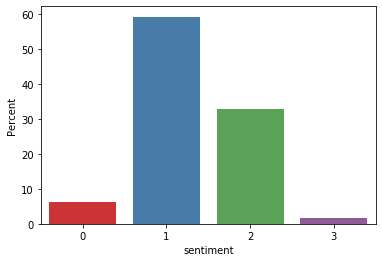

In [11]:
ax = sns.barplot(x="sentiment", y="sentiment", data=train, 
                 estimator=lambda x: len(x) / len(train) * 100,
                palette="Set1")
ax.set(ylabel="Percent")


# 2.  **Data Visualization**

### 2.1 Distribution of the number of words 

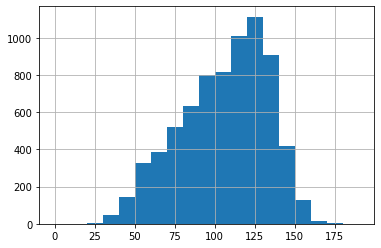

In [12]:
lens = train.tweet.str.len()
lens.hist(bins = np.arange(0,200,10))

### 2.2 Wordcloud

wordcloud for 'NEGATIVE' sentiments


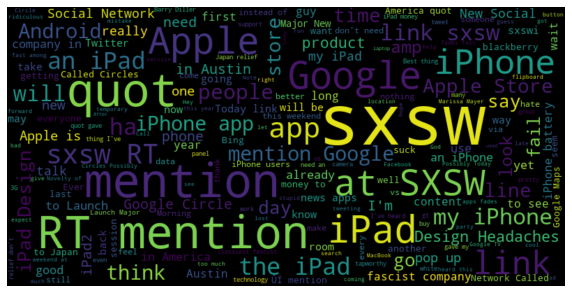

wordcloud for 'NEUTRAL' sentiments


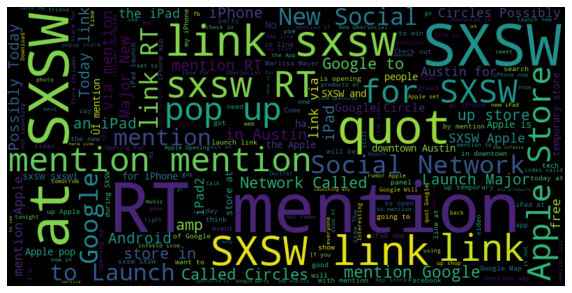

wordcloud for 'POSITIVE' sentiments


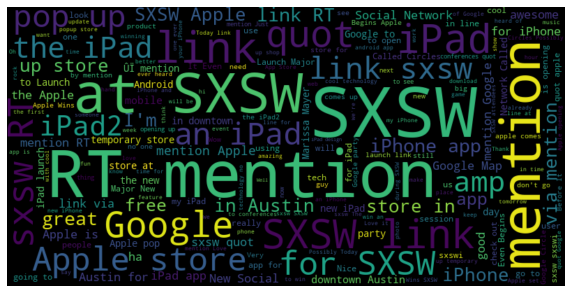

wordcloud for 'CANT_TELL' sentiments


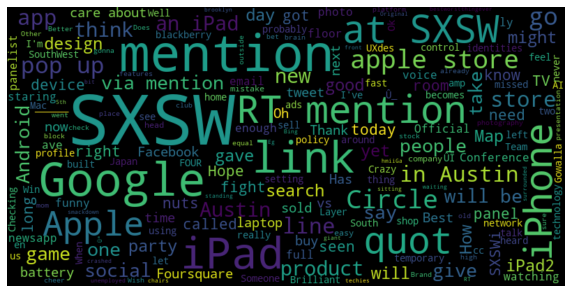

In [13]:
def create_wordcloud(train):
    wordcloud = WordCloud(background_color='black',
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)
    
    for i in range(len(CODE_TO_SENTIMENT)):
        sentiment = ' '.join([text for text in train.loc[train['sentiment'] == i, 'tweet']])
        print("wordcloud for '{}' sentiments".format(CODE_TO_SENTIMENT[i]))
        wordcloud.generate(sentiment)
        plt.figure(figsize=(10, 7))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.show()


create_wordcloud(train)

# 3.  **Preprocess Data**

In [14]:
stop_words = list(stopwords.words('english'))
wordcloud_stopwords = ['rt','mention','sxsw','link','apple',
                       'store','iphone','ipad','android','google']
stop_words.extend(wordcloud_stopwords)

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

def preprocess(dataframe):
    dataframe['cleaned'] = dataframe['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    dataframe['cleaned'] = dataframe['cleaned'].str.replace('(\w+:\/\/\S+)|^rt|http.+?|[^\w\s]','')
    dataframe['cleaned'] = np.vectorize(remove_pattern)(dataframe['cleaned'], "@[\w]*")
    dataframe['cleaned'] = np.vectorize(remove_pattern)(dataframe['cleaned'], "\d*")

    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda row: nltk.word_tokenize(row))
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda row: [word for word in row if word not in stop_words])
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda row: [word for word in row if word not in string.punctuation])
    
    lemmatizer = WordNetLemmatizer()
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda x: ' '.join(x))
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda x:unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
    dataframe['cleaned'] = dataframe['cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
    return dataframe 

train_p = preprocess(train) 
test_p  = preprocess(test) 


In [15]:
train_p.head()

,tweet,sentiment,cleaned
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui defining language touch different dial...
1,Learning ab Google doodles! All doodles should...,1,learning ab doodle doodle light funny amp inno...
2,one of the most in-your-face ex. of stealing t...,2,one inyourface ex stealing show yr quotat scho...
3,This iPhone #SXSW app would b pretty awesome i...,0,app would pretty awesome didnt crash every min...
4,Line outside the Apple store in Austin waiting...,1,line outside austin waiting new


# 4.  **Plot Data**


In [16]:
sent_NEG=train_p[train_p.sentiment == SENTIMENT_TO_CODE["NEGATIVE"]]
sent_NEU=train_p[train_p.sentiment == SENTIMENT_TO_CODE["NEUTRAL"]]
sent_POS=train_p[train_p.sentiment == SENTIMENT_TO_CODE["POSITIVE"]]
sent_CNT=train_p[train_p.sentiment == SENTIMENT_TO_CODE["CANT_TELL"]]

### 4.1 Unigram

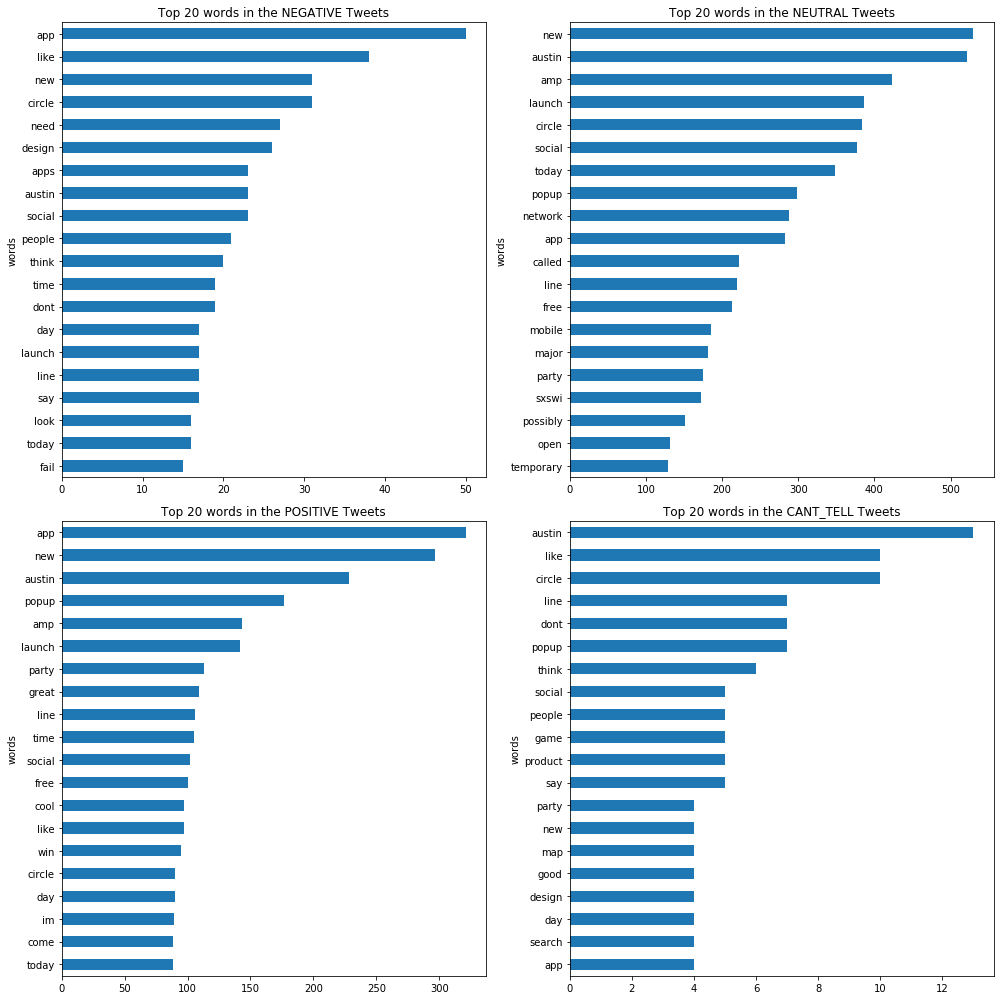

In [17]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_freq = words_freq[:n]
    df = pd.DataFrame(words_freq, columns = ['words' , 'count'])
    return df

plt.figure(1, figsize=(14, 14))

ax1 = plt.subplot(221)
plt.title('Top 20 words in the NEGATIVE Tweets')
common_words_df = get_top_n_words(sent_NEG['cleaned'], 20)
common_words_df.groupby('words').sum()['count'].sort_values().plot(kind='barh', ax=ax1)

ax2 = plt.subplot(222)
plt.title('Top 20 words in the NEUTRAL Tweets')
common_words_df = get_top_n_words(sent_NEU['cleaned'], 20)
common_words_df.groupby('words').sum()['count'].sort_values().plot(kind='barh', ax=ax2)

ax3 = plt.subplot(223)
plt.title('Top 20 words in the POSITIVE Tweets')
common_words_df = get_top_n_words(sent_POS['cleaned'], 20)
common_words_df.groupby('words').sum()['count'].sort_values().plot(kind='barh', ax=ax3)

ax4 = plt.subplot(224)
plt.title('Top 20 words in the CANT_TELL Tweets')
common_words_df = get_top_n_words(sent_CNT['cleaned'], 20)
common_words_df.groupby('words').sum()['count'].sort_values().plot(kind='barh', ax=ax4)

plt.tight_layout()

# 5. Feature Engineering

In [18]:

def feature_engineering(df):
    
    punctuation = string.punctuation
  
    # number of punctuations
    df['num_punc'] = df['tweet'].apply(lambda tweet_msg: len([punct for punct in tweet_msg if punct in punctuation]))

    # Finding the number of words in the headline
    df['num_words'] = df['tweet'].apply(lambda tweet_msg: len(tweet_msg.split()))

    # the unique number of words in the headline
    df['num_unique_words'] = df['tweet'].apply(lambda tweet_msg: len(set(tweet_msg.split())))

    # the number of characters in the headline
    df['num_chars'] = df['tweet'].apply(lambda tweet_msg: len(tweet_msg))

    # number of genuine words with no stopwords  
    df['num_words_nostop'] = df['tweet'].apply(lambda tweet_msg: len([word for word in tweet_msg.split() if word not in stop_words]))

    # number of stopwords
    df['num_stop_words'] = df['num_words'] - df['num_words_nostop']

    return df

In [19]:
train_fe = feature_engineering(train)
test_fe = feature_engineering(test)
print("train_fe.shape: ",train_fe.shape,"\n"\
      "test_fe.shape: ",test_fe.shape)

train_fe.shape:  (7273, 9) 
test_fe.shape:  (1819, 8)


In [20]:
train_fe.head(3)

,tweet,sentiment,cleaned,num_punc,num_words,num_unique_words,num_chars,num_words_nostop,num_stop_words
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui defining language touch different dial...,3,12,12,89,10,2
1,Learning ab Google doodles! All doodles should...,1,learning ab doodle doodle light funny amp inno...,8,19,19,143,15,4
2,one of the most in-your-face ex. of stealing t...,2,one inyourface ex stealing show yr quotat scho...,12,22,19,132,15,7


In [21]:
test_fe.head(3)

,tweet,cleaned,num_punc,num_words,num_unique_words,num_chars,num_words_nostop,num_stop_words
0,Audience Q: What prototyping tools do you use?...,audience prototyping tool use sketchbookssharp...,11,18,18,138,16,2
1,At SXSW? Send Your Best Photos &amp; Videos to...,send best photo amp video citizen_journalism c...,16,17,17,124,17,0
2,@mention and here's a pic of you winning your...,here pic winning unsix cc cont,13,18,15,108,13,5


# 6. **Model Building**

## 6.1 **Apply a baseline model**

In [22]:
def xy_separator(df):
    X = df.drop('sentiment', axis=1)
    y = df['sentiment']
    return X,y

X_train_data, y_train_data = xy_separator(train_p)
X_test_data = test_p

In [23]:
def run_model(dataframe,
              target,
              vectorizer=TfidfVectorizer(ngram_range=(1, 2), max_df=0.9, min_df=0.1),
              model=MultinomialNB()
             ):
    '''
    Performs model training and validate using f1-score
    '''
    X = dataframe
    y = target
    vect = vectorizer
    
    # splitting data into training and validation set
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)
    
    # Vectorize
    vector = vect.fit(X_train['cleaned'])
    X_train_vect = vector.transform(X_train['cleaned']).toarray()
    X_valid_vect = vector.transform(X_valid['cleaned']).toarray()
    
    # Fit and predict
    model.fit(X_train_vect, y_train)  
    y_pred = model.predict(X_valid_vect)  
    
    #validation using f1-score
    c_report = classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score) 
    
    return F1_score, y_pred

###  6.1.1   LogisticRegression - CountVectorizer

In [24]:
model = LogisticRegression(class_weight="balanced", random_state=0)
vectorizer = CountVectorizer(ngram_range=(1,3), binary=False, min_df=1)

F1_score, y_pred = run_model(X_train_data, y_train_data, vectorizer = vectorizer, model =model) 
print('===='*20)
print('Model - '+str(model),
      '\nVectorizer - '+str(vectorizer))
print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.47      0.31      0.37       137
           1       0.71      0.79      0.75      1291
           2       0.58      0.51      0.54       724
           3       0.11      0.07      0.08        30

    accuracy                           0.66      2182
   macro avg       0.47      0.42      0.44      2182
weighted avg       0.64      0.66      0.65      2182

F1_score:  0.6462236994164287
Model - LogisticRegression(class_weight='balanced', random_state=0) 
Vectorizer - CountVectorizer(ngram_range=(1, 3))


### 6.1.2  LogisticRegression - TfidfVectorizer

In [25]:
model = LogisticRegression(class_weight="balanced", random_state=0)
vectorizer = TfidfVectorizer(ngram_range=(1,2), binary=True)

F1_score, y_pred = run_model(X_train_data, y_train_data, vectorizer = vectorizer, model =model) 
print('===='*20)
print('Model - '+str(model),
      '\nVectorizer - '+str(vectorizer))
print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.31      0.41      0.35       137
           1       0.73      0.68      0.71      1291
           2       0.54      0.58      0.56       724
           3       0.05      0.03      0.04        30

    accuracy                           0.62      2182
   macro avg       0.41      0.43      0.41      2182
weighted avg       0.63      0.62      0.63      2182

F1_score:  0.6257488122549608
Model - LogisticRegression(class_weight='balanced', random_state=0) 
Vectorizer - TfidfVectorizer(binary=True, ngram_range=(1, 2))


### 6.2.1  MultinomialNB - CountVectorizer

In [26]:
model = MultinomialNB(alpha=1.0, fit_prior=False)
vectorizer = CountVectorizer(ngram_range=(1,2), binary=True, min_df=1)

F1_score, y_pred = run_model(X_train_data, y_train_data, vectorizer = vectorizer, model =model) 
print('===='*20)
print('Model - '+str(model),
      '\nVectorizer - '+str(vectorizer))
print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.58      0.28      0.37       137
           1       0.70      0.78      0.73      1291
           2       0.55      0.51      0.53       724
           3       0.11      0.03      0.05        30

    accuracy                           0.65      2182
   macro avg       0.48      0.40      0.42      2182
weighted avg       0.63      0.65      0.64      2182

F1_score:  0.6353524600498272
Model - MultinomialNB(fit_prior=False) 
Vectorizer - CountVectorizer(binary=True, ngram_range=(1, 2))


### 6.2.2  MultinomialNB - TfidfVectorizer

In [27]:
model = MultinomialNB(alpha=1.0, fit_prior=False)
vectorizer = TfidfVectorizer(ngram_range=(1,2), binary=True, min_df=1)

F1_score, y_pred = run_model(X_train_data, y_train_data, vectorizer = vectorizer, model =model) 
print('===='*20)
print('Model - '+str(model),
      '\nVectorizer - '+str(vectorizer))
print('===='*20)

classification report: 
               precision    recall  f1-score   support

           0       0.66      0.24      0.35       137
           1       0.67      0.85      0.75      1291
           2       0.59      0.40      0.47       724
           3       0.12      0.03      0.05        30

    accuracy                           0.65      2182
   macro avg       0.51      0.38      0.41      2182
weighted avg       0.64      0.65      0.62      2182

F1_score:  0.6243388744554182
Model - MultinomialNB(fit_prior=False) 
Vectorizer - TfidfVectorizer(binary=True, ngram_range=(1, 2))


 ## 6.2 **Up-sample Minority Class**

In [28]:
train_p_majority_NEU = train_p[train_p.sentiment==SENTIMENT_TO_CODE["NEUTRAL"]]

train_p_minority_NEG = train_p[train_p.sentiment==SENTIMENT_TO_CODE["NEGATIVE"]]
train_p_minority_POS = train_p[train_p.sentiment==SENTIMENT_TO_CODE["POSITIVE"]]
train_p_minority_CNT = train_p[train_p.sentiment==SENTIMENT_TO_CODE["CANT_TELL"]]

df_minority_upsampled_NEG = resample(train_p_minority_NEG, 
                                 replace=True,      # sample with replacement
                                 n_samples=4310,    # to match majority class
                                 random_state=0)    # reproducible results
df_minority_upsampled_POS = resample(train_p_minority_POS, 
                                 replace=True,      # sample with replacement
                                 n_samples=4310,    # to match majority class
                                 random_state=0)    # reproducible results
df_minority_upsampled_CNT = resample(train_p_minority_CNT, 
                                 replace=True,      # sample with replacement
                                 n_samples=4310,    # to match majority class
                                 random_state=0)    # reproducible results

df_upsampled = pd.concat([train_p_majority_NEU, df_minority_upsampled_NEG,
                          df_minority_upsampled_POS, df_minority_upsampled_CNT])

print(df_upsampled.shape)
X_train_data_upsampled, y_train_data_upsampled = xy_separator(df_upsampled)
X_test_data = test_p

(17240, 9)


### check class imbalance after upsampling

[Text(0, 0.5, 'Percent')]

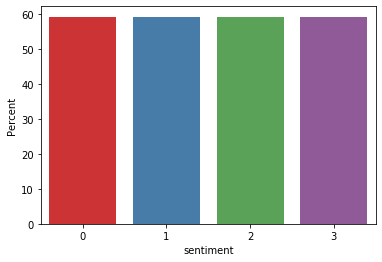

In [29]:
ax = sns.barplot(x="sentiment", y="sentiment", data=df_upsampled, 
                 estimator=lambda x: len(x) / len(train) * 100,
                palette="Set1")
ax.set(ylabel="Percent")


In [30]:
LR = OneVsRestClassifier(LogisticRegression(class_weight="balanced", random_state=0))
MNB = OneVsRestClassifier(MultinomialNB(alpha=1.0, fit_prior=False))

## 6.3  **Ensembling**

In [31]:
%%time
def ensemble(dataframe,target):
    X = dataframe
    y = target
    
    CV = CountVectorizer(ngram_range=(1, 3))
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
     
    # TF-IDF feature matrix
    CV.fit(X_train['cleaned'])
    X_train_vect = CV.transform(X_train['cleaned']).toarray()
    X_valid_vect = CV.transform(X_valid['cleaned']).toarray()
   
    model1 = LR
    model2 = MNB
    
    model = VotingClassifier(estimators=[('lr', model1),('mnb', model2)], voting='soft')
    
    model.fit(X_train_vect,y_train)
    y_pred = model.predict(X_valid_vect) 
    
    #validation using f1-score
    c_report = classification_report(y_valid, y_pred)
    print('classification report: \n', c_report)
    F1_score = f1_score(y_valid, y_pred,average='weighted')
    print('F1_score: ',F1_score)
    return CV, model

final_vectrizer, final_model = ensemble(X_train_data_upsampled, y_train_data_upsampled)

classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1318
           1       0.82      0.69      0.75      1244
           2       0.80      0.84      0.82      1297
           3       0.95      1.00      0.97      1313

    accuracy                           0.88      5172
   macro avg       0.88      0.88      0.87      5172
weighted avg       0.88      0.88      0.88      5172

F1_score:  0.8761381844687642
CPU times: user 16min 37s, sys: 53.8 s, total: 17min 31s
Wall time: 5min 32s


# 7. **Final Submission**

In [32]:
X_test_vect = final_vectrizer.transform(X_test_data['cleaned']).toarray()

final_pred = final_model.predict(X_test_vect)

In [33]:
#Create a  DataFrame with the tweet_id and our prediction regarding sentiment
submission = pd.DataFrame({'tweet_id':test_data['tweet_id'],'Sentiment':final_pred})
print(submission.shape)
submission.head()


(1819, 2)


,tweet_id,Sentiment
0,7506,1
1,7992,1
2,247,1
3,7688,2
4,3294,2


In [34]:
submission.to_csv('submission.csv', index=False)

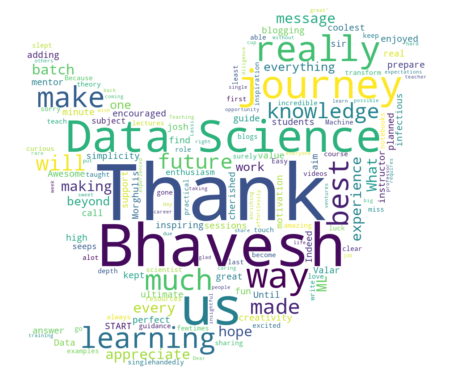